In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv('C:/Users/LENOVO/OneDrive - Universitas Airlangga/Project/Shopee Abang Stiker/salesdata.csv')
data.head(1)

,No. Pesanan,Status Pesanan,Opsi Pengiriman,Antar ke counter/ pick-up,Waktu,Nama Produk,Pendapatan,Jumlah Produk di Pesan,Total Berat,Total Pembayaran,Perkiraan Ongkos Kirim,Username (Pembeli),Kota/Kabupaten,Provinsi,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,200720U69AERNK,Selesai,J&T Express,Antar ke Counter,2020-07-20 15:54,Stiker Fragile Biasa 6 x 4 cm,10000.0,400,400 gr,43.750,7.0,murapol,KOTA SURABAYA,JAWA TIMUR,NaN,NaN,NaN


# EDA & Data Pre - Processing

In [3]:
c = ['No. Pesanan', 'Status Pesanan', 'Opsi Pengiriman',
       'Antar ke counter/ pick-up','Nama Produk', 'Jumlah Produk di Pesan', 'Total Berat',
       'Total Pembayaran', 'Perkiraan Ongkos Kirim', 'Username (Pembeli)',
       'Kota/Kabupaten', 'Provinsi','Unnamed: 14','Unnamed: 15','Unnamed: 16']
data = data.drop(c,axis=1,inplace=False)
data

,Waktu,Pendapatan
0,2020-07-20 15:54,10000.0
1,2020-07-20 15:54,10000.0
2,2020-07-20 15:54,10000.0
3,2020-07-20 15:54,19000.0
4,2020-07-21 05:36,30000.0
...,...,...
3123,2022-08-31 00:03,598.0
3124,2022-08-31 15:52,897.0
3125,2022-08-31 15:52,897.0
3126,2022-08-31 15:55,897.0


In [4]:
data.dtypes

Waktu          object
Pendapatan    float64
dtype: object

In [5]:
data.Waktu = pd.to_datetime(data.Waktu)
data.dtypes

Waktu         datetime64[ns]
Pendapatan           float64
dtype: object

In [6]:
data=data.set_index('Waktu',drop=True)
data

,Pendapatan
Waktu,
2020-07-20 15:54:00,10000.0
2020-07-20 15:54:00,10000.0
2020-07-20 15:54:00,10000.0
2020-07-20 15:54:00,19000.0
2020-07-21 05:36:00,30000.0
...,...
2022-08-31 00:03:00,598.0
2022-08-31 15:52:00,897.0
2022-08-31 15:52:00,897.0


In [7]:
data = data[['Pendapatan']].resample('W').sum()
data.head()

,Pendapatan
Waktu,
2020-07-26,270900.0
2020-08-02,40000.0
2020-08-09,214500.0
2020-08-16,178000.0
2020-08-23,155000.0


<AxesSubplot:xlabel='Waktu'>

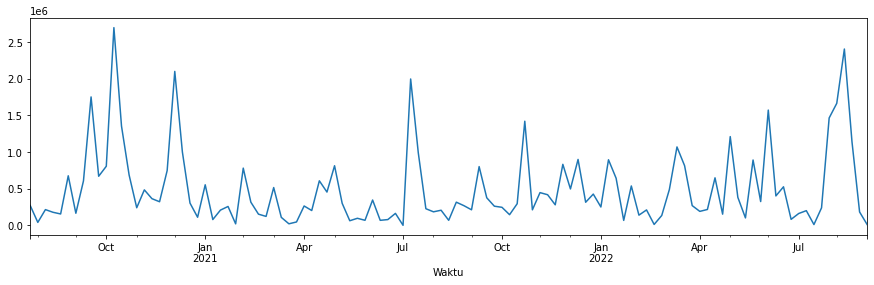

In [8]:
data['Pendapatan'].plot(figsize=(15,4))

# Dickey Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Terdapat bukti yang kuat untuk menolak H0. Data bersifat stationary")
    else:
        print("Gagal tolak H0, terdapat indikasi non-stationary ")

In [11]:
adf_test(data.Pendapatan)

ADF Statistics: -5.479577762540429
p- value: 2.300424506436343e-06
Terdapat bukti yang kuat untuk menolak H0. Data bersifat stationary


# PACF & ACF Plot

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


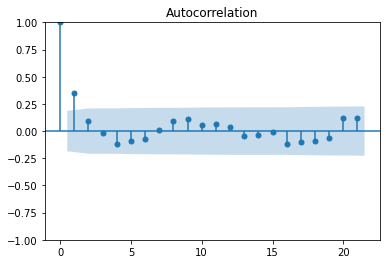

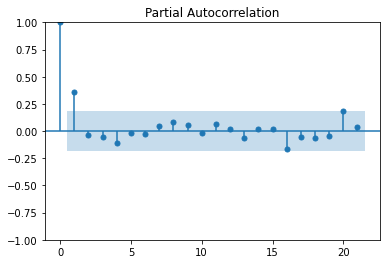

In [13]:
acf = plot_acf(data["Pendapatan"].dropna())
pacf = plot_pacf(data["Pendapatan"].dropna())

# Dividing Train Test Data

In [14]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,9,1)
test_dataset_end=datetime(2022,9,1)

In [15]:
train_data=data[:train_dataset_end]
test_data=data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [16]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [17]:
test_data.head()

,Pendapatan
Waktu,
2021-09-05,211990.0
2021-09-12,801684.0
2021-09-19,376125.0
2021-09-26,261175.0
2021-10-03,246000.0


# Create SARIMAX Model

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model_SARIMAX=SARIMAX(train_data['Pendapatan'],order=(2,0,2),seasonal_order=(0,1,0,7))

In [71]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [72]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Pendapatan   No. Observations:                   58
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 7)   Log Likelihood                -763.111
Date:                            Sat, 10 Sep 2022   AIC                           1536.222
Time:                                    21:48:34   BIC                           1545.881
Sample:                                07-26-2020   HQIC                          1539.913
                                     - 08-29-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1503      2.481      0.061      0.952      -4.713       5.014
ar.L2          0.2168      0.968      0.224      0.823      -1.680       2.114
ma.L1          0.1964      2.477      0.079      0.937      -4.659       5.052
ma.L2         -0.1803      0.381     -0.473      0.636      -0.927       0.567
sigma2      4.722e+11   1.51e-11   3.13e+22      0.000    4.72e+11    4.72e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.27
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.54   Skew:                             0.37
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.46e+38. Standard errors may be unstable.
"""

In [73]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-09-05 00:00:00
2022-08-28 00:00:00


In [74]:
pred_Sarima=model_SARIMAX_fit.predict(start=datetime(2021,9,5),end=datetime(2022,8,28))
residuals=test_data['Pendapatan']-pred_Sarima

<AxesSubplot:xlabel='Waktu'>

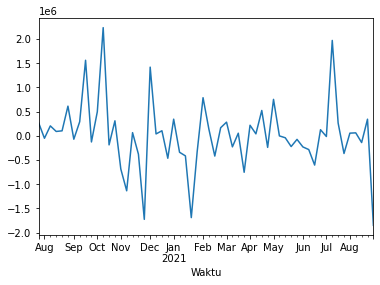

In [75]:
model_SARIMAX_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

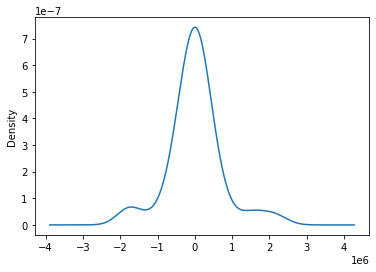

In [76]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [77]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13396\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [78]:
test_data.head()

,Pendapatan,Predicted_SARIMA
Waktu,,
2021-09-05,211990.0,376515.189021
2021-09-12,801684.0,92470.303187
2021-09-19,376125.0,30628.539156
2021-09-26,261175.0,153850.093996
2021-10-03,246000.0,27202.509681


<AxesSubplot:xlabel='Waktu'>

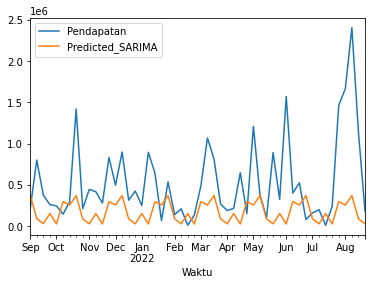

In [79]:
test_data[['Pendapatan','Predicted_SARIMA']].plot()